In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data=pd.read_csv('rfm_data.csv')
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [56]:
df=data.copy()
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [57]:
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [58]:
df.Location.value_counts()

Tokyo       278
New York    247
London      246
Paris       229
Name: Location, dtype: int64

In [59]:
df.dtypes

CustomerID              int64
PurchaseDate           object
TransactionAmount     float64
ProductInformation     object
OrderID                 int64
Location               object
dtype: object

In [60]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])

In [80]:
import datetime
day=datetime.date.today()
day=pd.to_datetime(day)
df['PurchaseDate']=pd.to_datetime(df["PurchaseDate"])

Recency=df.groupby(["CustomerID"]).agg({"PurchaseDate":lambda x:((day-x.max()).days)})
Recency.rename(columns={'PurchaseDate': 'Frequency'}, inplace=True)

In [84]:
Recency

,Frequency
CustomerID,
1011,156
1025,144
1029,123
1046,166
1049,136
...,...
9941,165
9950,161
9954,135


In [91]:
frequency=df.drop_duplicates(subset="OrderID").groupby(["CustomerID"])[["OrderID"]].count()
frequency.rename(columns={'OrderID': 'Frequency'}, inplace=True)
frequency

,Frequency
CustomerID,
1011,2
1025,1
1029,1
1046,1
1049,1
...,...
9941,1
9950,1
9954,1


In [86]:
money_paid=df.groupby(["CustomerID"])[["TransactionAmount"]].sum()
money_paid.rename(columns={'TransactionAmount': 'Monetary'}, inplace=True)
money_paid

,Monetary
CustomerID,
1011,1129.02
1025,359.29
1029,704.99
1046,859.82
1049,225.72
...,...
9941,960.53
9950,679.11
9954,798.01


In [92]:
Recency_frequency_money=pd.concat([Recency,frequency,money_paid], axis=1)
Recency.columns=["Recency"]
frequency.columns=["Frequency"]
money_paid.columns=["Monetary"]
Recency_frequency_money

,Recency,Frequency,Monetary
CustomerID,,,
1011,156,2,1129.02
1025,144,1,359.29
1029,123,1,704.99
1046,166,1,859.82
1049,136,1,225.72
...,...,...,...
9941,165,1,960.53
9950,161,1,679.11
9954,135,1,798.01


In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(Recency_frequency_money)
from sklearn.cluster import KMeans

C:\Users\deji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\deji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\deji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\deji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

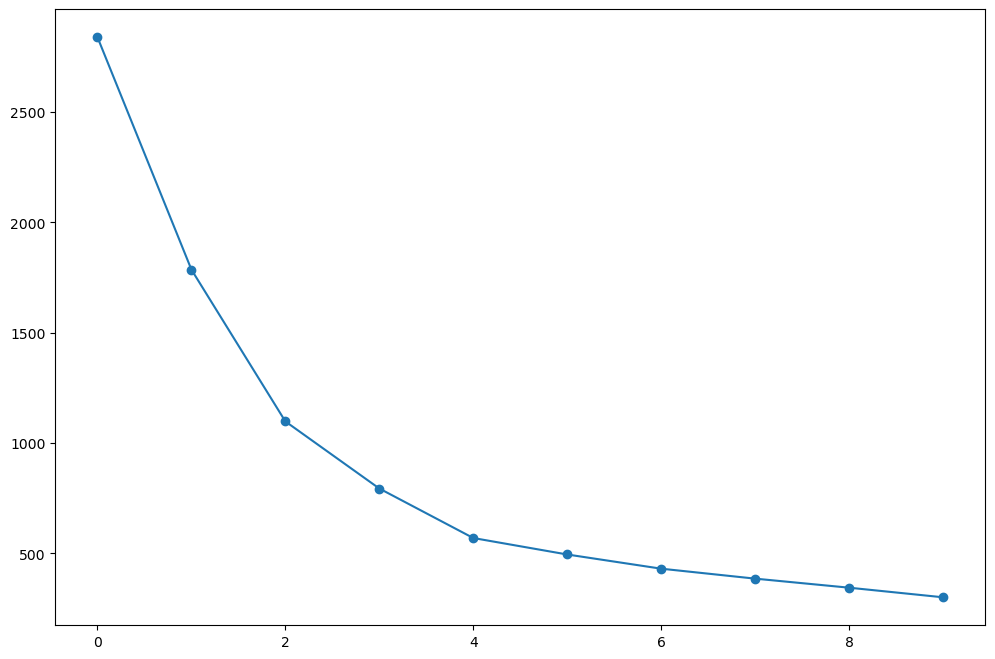

In [94]:
inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

gouping customers based on clusters using Kmeans. KMeans elbow falls at 3. Therefore number of clusters to use for grouping is 3
that is 3 different groups of people

In [95]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
Recency_frequency_money["Clusters"]=(kmeans.labels_+1)
#kmeans label +1 because this changes numbering of clusters from 0,1,2 to 1,2,3.

C:\Users\deji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


This tells us which customer falls into which group

In [96]:
Recency_frequency_money

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
1011,156,2,1129.02,3
1025,144,1,359.29,1
1029,123,1,704.99,1
1046,166,1,859.82,2
1049,136,1,225.72,1
...,...,...,...,...
9941,165,1,960.53,2
9950,161,1,679.11,2
9954,135,1,798.01,1


In [97]:
total_aggregate=Recency_frequency_money.groupby("Clusters")["Recency","Frequency","Monetary"].mean()
total_aggregate

C:\Users\deji\AppData\Local\Temp\ipykernel_20208\2211736076.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_aggregate=Recency_frequency_money.groupby("Clusters")["Recency","Frequency","Monetary"].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,137.012107,1.000000,518.210460
2,167.439834,1.000000,508.217033
3,145.686275,2.058824,1072.476078


from the mean we can see how each category is faring, for cluster 1 there is a recency of 137,frequency of 1, monetay value of 518 on average, cluster 2 has a frequency of 1, a monetary value of 508 ,a recency of 167 on average and 145 recency on average for cluster 3, frequency of 2 and monetary value of 1072. Cluster 3 is champions ie customers spending a alot of money, cluster 2 are the people with the highest recency so they are probablycustomers that are not loyal to us or have lapsed in patronage, cluster 1 is the average customer with the lowest recency that is the most recent purchases.

In [98]:
def func(row):
    if row["Clusters"]==3:
        return 'champions'
    elif row["Clusters"]==2:
        return 'disloyal'
    else:
        return 'normal'

In [99]:
Recency_frequency_money['segments']=Recency_frequency_money.apply(func, axis=1)
Recency_frequency_money

,Recency,Frequency,Monetary,Clusters,segments
CustomerID,,,,,
1011,156,2,1129.02,3,champions
1025,144,1,359.29,1,normal
1029,123,1,704.99,1,normal
1046,166,1,859.82,2,disloyal
1049,136,1,225.72,1,normal
...,...,...,...,...,...
9941,165,1,960.53,2,disloyal
9950,161,1,679.11,2,disloyal
9954,135,1,798.01,1,normal


In [100]:
overall=Recency_frequency_money.segments.value_counts()
overall

disloyal     482
normal       413
champions     51
Name: segments, dtype: int64

<Axes: >

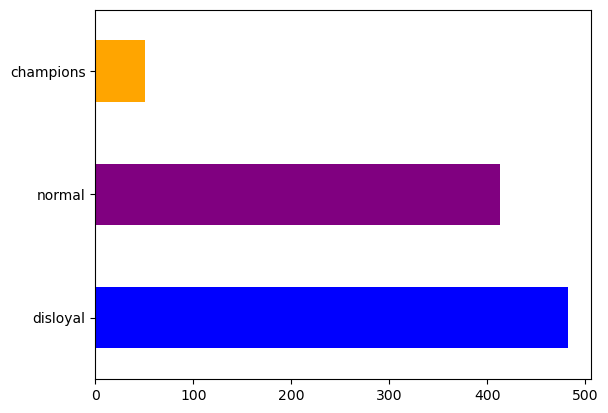

In [101]:
overall.plot(kind="barh", color=["Blue","Purple","Orange"])